In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import netCDF4 as nc
import numpy as np
import datetime
from datetime import datetime, timedelta, timezone
import matplotlib

import plotly.express as px
import plotly.graph_objects as go

In [3]:
ds = xr.open_dataset('wsa_enlil.mrid00057708.suball.nc')

In [19]:
ds

<xarray.Dataset>
Dimensions:               (x: 512, y: 60, z: 180, t: 169, earth_t: 13988)
Dimensions without coordinates: x, y, z, t, earth_t
Data variables: (12/56)
    x_coord               (x) float32 ...
    y_coord               (y) float32 ...
    z_coord               (z) float32 ...
    time                  (t) float32 -1.727e+05 -1.692e+05 ... 4.321e+05
    dd12_3d               (t, y, x) int16 ...
    vv12_3d               (t, y, x) int16 ...
    ...                    ...
    STEREO_B_V3           (earth_t) float32 ...
    STEREO_B_B1           (earth_t) float32 ...
    STEREO_B_B2           (earth_t) float32 ...
    STEREO_B_B3           (earth_t) float32 ...
    STEREO_B_DP_CME       (earth_t) float32 ...
    STEREO_B_BP_POLARITY  (earth_t) float32 ...
Attributes: (12/14)
    REFDATE_MJD:           60990.582
    REFDATE_CAL:           2025-11-11T14:00:00
    OBSDATE_MJD:           60990.582
    OBSDATE_CAL:           2025-11-11T14:00:00
    program:               enlil
    enlil_version:         2.9
    ...                    ...
    wsa_vel_file:          wsa.gong.fits
    observatory:           gongb
    model_run_id:          57708
    execution_start_time:  2025-11-11 14:10
    PDY:                   20251111
    cyc:                   14

In [21]:
x = ds["x_coord"]
y = ds["y_coord"]
z = ds["z_coord"]
r = np.sqrt(x**2 + y**2 + z**2)

In [38]:
earth_time = ds["Earth_TIME"].values  # in seconds
ref_str = ds.attrs["REFDATE_CAL"]     # e.g. "2025-11-11T14:00:00"

# --- Parse reference time ---
ref_dt = datetime.fromisoformat(ref_str).replace(tzinfo=timezone.utc)

# --- Convert ---
converted_times = [ref_dt + timedelta(seconds=float(s)) for s in earth_time]

# unit for 'Earth_Density' = kg/m^3
# --- Convert to /cm^3
proton_mass = 1.6726*10**(-27)
converted_density_earth = ds['Earth_Density']/proton_mass*10**(-6)



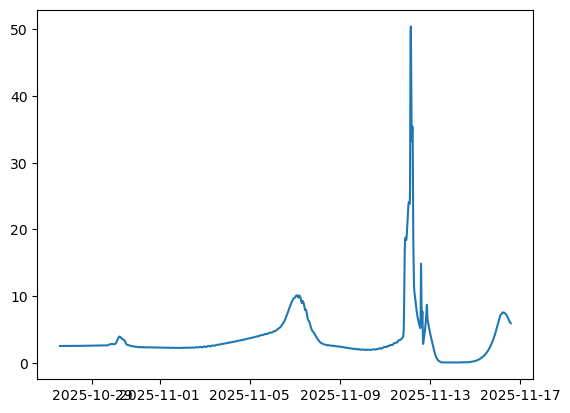

In [37]:
plt.plot(converted_times,converted_density_earth)

In [35]:
fig = px.line(df, x="Time (UTC)", y="Density (cm^-3)", title="Solar Wind Density at Earth (ENLIL)")
fig.update_layout(template="plotly_dark", yaxis_title="Proton Density (cm⁻³)")
fig.show()

<xarray.DataArray 'Earth_Density' (earth_t: 13988)>
array([4.191842e-21, 4.191858e-21, 4.191873e-21, ..., 9.918320e-21,
       9.909583e-21, 9.900759e-21], dtype=float32)
Dimensions without coordinates: earth_t

In [48]:
# Create a line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=converted_times, y=converted_density_earth, mode='lines', name='Density'))

fig.update_layout(
    title="Solar Wind Density vs Time",
    xaxis_title="Time (hours)",
    yaxis_title="Density (cm⁻³)",
    template="plotly_dark"
)
fig.show()

In [5]:
ds2 = xr.open_dataset('plasma-1-day.nc')

In [20]:
ds3 = xr.open_dataset('mag-1-day.nc')

In [21]:
ds3

<xarray.Dataset>
Dimensions:  (time: 1431)
Coordinates:
  * time     (time) datetime64[ns] 2025-11-10T23:20:00 ... 2025-11-11T23:17:00
Data variables:
    bx_gsm   (time) float64 ...
    by_gsm   (time) float64 ...
    bz_gsm   (time) float64 ...
    bt       (time) float64 ...
    lon_gsm  (time) float64 ...
    lat_gsm  (time) float64 ...
Attributes:
    title:        ACE/RTSW MAG (GSM) — JSON to NetCDF
    source_json:  e5ff9626-a217-49da-9a40-cca11882b634.json
    Conventions:  CF-1.10
    history:      Converted with pandas/xarray

In [23]:
time = ds2['time']
density = ds2['density']
speed = ds2['speed']
bz = ds3['bz_gsm']
bt = ds3['bt']

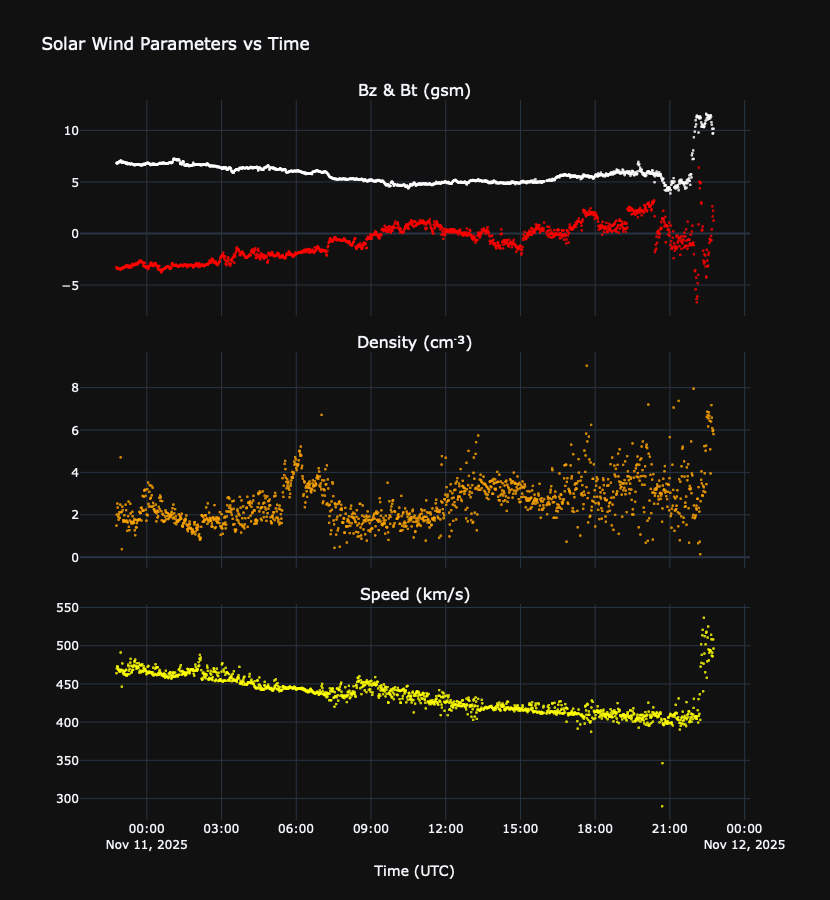

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,  # 调整上下间距
    subplot_titles=("Bz & Bt (gsm)", "Density (cm⁻³)", "Speed (km/s)")
)

# 添加 Bz & Bt 曲线
fig.add_trace(
    go.Scatter(x=time, y=bz, mode="markers", marker=dict(color="red", size=3, opacity=0.8),name="Bt & Bz", line=dict(color="salmon")),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=time, y=bt,
        mode="markers",
        marker=dict(color="white", size=3, opacity=0.8),
        name="Bt",
    ),
    row=1, col=1
)

# 添加 Density 曲线
fig.add_trace(
    go.Scatter(x=time, y=density, mode="markers", marker=dict(color="orange", size=3, opacity=0.8), 
               name="Density", line=dict(color="lightskyblue")),
    row=2, col=1
)

# 添加 Speed 曲线
fig.add_trace(
    go.Scatter(x=time, y=speed, mode="markers", marker=dict(color="yellow", size=3, opacity=0.8),name="Speed", line=dict(color="lightgreen")),
    row=3, col=1
)


# 更新整体布局
fig.update_layout(
    height=900, width=900,
    title="Solar Wind Parameters vs Time",
    xaxis3_title="Time (UTC)",
    template="plotly_dark",
    showlegend=False  # 可设为 True 在右上角显示图例
)

# 显示图像
fig.show()